# User Intereset Analysis

## I. Setup


In [1]:
import sys
sys.path.append('..')


In [2]:
import pandas as pd

from lib.types.dataset_type import DatasetType
from lib.types.source_type import SourceType


In [3]:
movies_df = pd.read_csv(DatasetType.movies_metadata.cleaned_path())
movies_df.rename(
    columns={'id': 'movie_id'},
    inplace=True
)
movies_df.shape


/var/folders/g8/wgj905m158gbcnzm6q5v9y2r0000gn/T/ipykernel_12352/1605917533.py:1: DtypeWarning: Columns (0,1) have mixed types. Specify dtype option on import or set low_memory=False.
  movies_df = pd.read_csv(DatasetType.movies_metadata.cleaned_path())


(45465, 18)

In [4]:
movies_df.columns


Index(['budget', 'movie_id', 'popularity', 'revenue', 'runtime', 'title',
       'vote_average', 'vote_count', 'genre_ids', 'genres', 'btc_name',
       'btc_id', 'genres1', 'genres2', 'genres3', 'genres4', 'avg_rating',
       'quantity'],
      dtype='object')

In [5]:
rating_df = pd.read_csv(DatasetType.ratings.original_path())
rating_df.rename(
    columns={'userId': 'user_id', 'movieId': 'movie_id'},
    inplace=True
)
rating_df.sample(10)


,user_id,movie_id,rating,timestamp
11669775,121045,1573,2.0,1112406841
24177658,251174,56757,3.0,1498219842
22641892,235259,59784,5.0,1294349561
16731991,174013,2000,3.0,956791722
1345539,13839,8905,3.0,1182631955
6975658,71968,4973,5.0,1413557669
3627964,37828,318,4.0,1115266904
18121569,188127,356,4.0,943867674
23811146,247257,48385,4.0,1438560679
17548943,182102,50,4.0,1143981420


## II. Find all genres


In [6]:
def find_all_genres(genres: pd.Series):
    genres = genres.str.split("|")
    genres_cleaned = [item for item in genres.to_list()
                      if isinstance(item, list)]

    all_movie_genres = "|".join([
        "|".join(i)
        for i in genres_cleaned
    ]).split("|")

    all_movie_genres = set(all_movie_genres)
    return list(all_movie_genres)


all_genres = find_all_genres(movies_df['genres'])
all_genres


['Sentai Filmworks',
 'Crime',
 'Thriller',
 'Horror',
 'Family',
 'History',
 'Fantasy',
 'Adventure',
 'Western',
 'Animation',
 'Comedy',
 'Aniplex',
 'GoHands',
 'Mardock Scramble Production Committee',
 'Science Fiction',
 'Documentary',
 'Vision View Entertainment',
 'Drama',
 'Telescene Film Group Productions',
 'Music',
 'Foreign',
 'War',
 'Romance',
 'TV Movie',
 'Carousel Productions',
 'Action',
 'BROSTA TV',
 'Mystery']

## III. Find user interest per user


In [7]:
user_id = 123963

rating_per_user_df = rating_df[rating_df['user_id'] == user_id]
rating_per_user_df['movie_id'] = rating_per_user_df['movie_id'].astype(str)

rating_per_user_df


/var/folders/g8/wgj905m158gbcnzm6q5v9y2r0000gn/T/ipykernel_12352/2299255815.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rating_per_user_df['movie_id'] = rating_per_user_df['movie_id'].astype(str)


,user_id,movie_id,rating,timestamp
11959259,123963,47,4.0,1485300814
11959260,123963,111,1.5,1485362108
11959261,123963,253,4.5,1485310359
11959262,123963,260,2.0,1485292966
11959263,123963,293,4.0,1485362616
...,...,...,...,...
11959584,123963,156726,5.0,1486092275
11959585,123963,160565,4.5,1485300861
11959586,123963,160571,5.0,1485293711
11959587,123963,161634,5.0,1490017471


In [8]:
movies_per_user_df = pd.merge(
    left=rating_per_user_df,
    right=movies_df,
    on='movie_id'
)

movies_per_user_df


,user_id,movie_id,rating,timestamp,budget,popularity,revenue,runtime,title,vote_average,...,genre_ids,genres,btc_name,btc_id,genres1,genres2,genres3,genres4,avg_rating,quantity
0,123963,111,1.5,1485362108,25000000,11.299673,65884703.0,170.0,Scarface,8.0,...,28|80|18|53,Action|Crime|Drama|Thriller,NaN,NaN,Action,Crime,Drama,Thriller,4.089309,111
1,123963,253,4.5,1485310359,7000000,9.773768,161777836.0,121.0,Live and Let Die,6.4,...,12|28|53,Adventure|Action|Thriller,James Bond Collection,645.0,Adventure,Action,Thriller,Adventure,3.501930,253
2,123963,260,2.0,1485292966,0,5.865697,0.0,86.0,The 39 Steps,7.4,...,28|53|9648,Action|Thriller|Mystery,NaN,NaN,Action,Thriller,Mystery,Action,4.132299,260
3,123963,293,4.0,1485362616,0,12.583826,43440294.0,123.0,A River Runs Through It,7.0,...,18,Drama,NaN,NaN,Drama,Drama,Drama,Drama,4.080149,293
4,123963,296,5.0,1485293102,200000000,20.818907,435000000.0,109.0,Terminator 3: Rise of the Machines,5.9,...,28|53|878,Action|Thriller|Science Fiction,The Terminator Collection,528.0,Action,Thriller,Science Fiction,Action,4.169975,296
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68,123963,88744,3.5,1486092935,0,0.511713,0.0,93.0,The Woman with the 5 Elephants,6.5,...,99|10769,Documentary|Foreign,NaN,NaN,Documentary,Foreign,Documentary,Documentary,3.556342,88744
69,123963,93840,2.0,1485308986,0,0.773371,0.0,94.0,Blind Man,5.9,...,53|28,Thriller|Action,NaN,NaN,Thriller,Action,Thriller,Thriller,3.621480,93840
70,123963,97938,5.0,1485293352,0,1.092700,0.0,87.0,Heart of the Country,6.0,...,10751|10749|18,Family|Romance|Drama,NaN,NaN,Family,Romance,Drama,Family,3.706433,97938
71,123963,98491,1.5,1485309502,0,1.090793,0.0,104.0,Wuthering Heights,7.0,...,18|10749,Drama|Romance,NaN,NaN,Drama,Romance,Drama,Drama,4.095850,98491


In [9]:
movies_per_user_df.sort_values(by=['rating'], ascending=False)


,user_id,movie_id,rating,timestamp,budget,popularity,revenue,runtime,title,vote_average,...,genre_ids,genres,btc_name,btc_id,genres1,genres2,genres3,genres4,avg_rating,quantity
13,123963,1645,5.0,1485309885,40000000,13.309013,152266007.0,149.0,A Time to Kill,7.0,...,80|18|53,Crime|Drama|Thriller,NaN,NaN,Crime,Drama,Thriller,Crime,3.516590,1645
60,123963,53129,5.0,1485364196,0,0.963791,0.0,130.0,The Turkish Gambit,6.3,...,9648|12|28|18|36,Mystery|Adventure|Action|Drama|History,The Adventures of Erast Fandorin,93446.0,Mystery,Adventure,Action,Drama,3.657163,53129
4,123963,296,5.0,1485293102,200000000,20.818907,435000000.0,109.0,Terminator 3: Rise of the Machines,5.9,...,28|53|878,Action|Thriller|Science Fiction,The Terminator Collection,528.0,Action,Thriller,Science Fiction,Action,4.169975,296
42,123963,8874,5.0,1485293830,38000000,4.678572,299288605.0,105.0,My Best Friend's Wedding,6.4,...,35|10749,Comedy|Romance,NaN,NaN,Comedy,Romance,Comedy,Comedy,3.884575,8874
7,123963,593,5.0,1485292919,0,11.059785,0.0,167.0,Solaris,7.7,...,18|878|12|9648,Drama|Science Fiction|Adventure|Mystery,NaN,NaN,Drama,Science Fiction,Adventure,Mystery,4.152246,593
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44,123963,8965,0.5,1486093980,0,7.751536,0.0,70.0,Atlantis: Milo's Return,5.4,...,14|16|878|10751|28,Fantasy|Animation|Science Fiction|Family|Action,Atlantis Collection,100965.0,Fantasy,Animation,Science Fiction,Family,3.107816,8965
24,123963,4368,0.5,1486094108,2500000,0.944886,0.0,94.0,Dark Wolf,3.4,...,27,Horror,NaN,NaN,Horror,Horror,Horror,Horror,2.428208,4368
19,123963,2692,0.5,1486092228,0,0.123453,0.0,90.0,The Red Elvis,8.0,...,99,Documentary,NaN,NaN,Documentary,Documentary,Documentary,Documentary,3.979886,2692
14,123963,1907,0.5,1486093221,40000000,14.430311,144056873.0,119.0,The Beach,6.3,...,18|12|10749|53,Drama|Adventure|Romance|Thriller,NaN,NaN,Drama,Adventure,Romance,Thriller,3.691785,1907


In [10]:
", ".join(movies_per_user_df.columns.to_list())


'user_id, movie_id, rating, timestamp, budget, popularity, revenue, runtime, title, vote_average, vote_count, genre_ids, genres, btc_name, btc_id, genres1, genres2, genres3, genres4, avg_rating, quantity'

In [11]:
print("HERE IS ALL GENRES THAT USER HAVE RATED:")
", ".join(find_all_genres(movies_per_user_df['genres']))


HERE IS ALL GENRES THAT USER HAVE RATED:


'Crime, Thriller, Horror, Family, History, Fantasy, Adventure, Western, Animation, Comedy, Science Fiction, Documentary, Drama, Music, Foreign, Romance, TV Movie, Action, Mystery'

## IV. Average rating for each genre


In [12]:
def get_avg_rating_dict(input_df: pd.DataFrame):
    rating_dict = {}
    avg_rating_dict = {}

    for row in input_df.values:
        # movie_id = row[1]
        rating = row[2]
        genres = row[12]

        for genre in str(genres).split("|"):
            if(rating_dict.get(genre) == None):
                rating_dict[genre] = []
            rating_dict[genre].append(rating)

    for key, value in rating_dict.items():
        avg_rating_dict[key] = sum(value) / len(value)

    dict_sorted = sorted(
        avg_rating_dict.items(),
        key=lambda element: element[1],
        reverse=True,
    )

    avg_rating_dict = {key: value for key, value in dict_sorted}
    return avg_rating_dict


In [13]:
print("HERE IS AVERAGE RATING FOR GENRE FOR USER: {}".format(user_id))
avg_rating_dict = get_avg_rating_dict(movies_per_user_df)
avg_rating_dict


HERE IS AVERAGE RATING FOR GENRE FOR USER: 123963


{'TV Movie': 4.0,
 'Adventure': 3.875,
 'Foreign': 3.6666666666666665,
 'Western': 3.5,
 'History': 3.5,
 'Romance': 3.4642857142857144,
 'Horror': 3.4444444444444446,
 'Fantasy': 3.375,
 'Science Fiction': 3.35,
 'Drama': 3.3205128205128207,
 'Action': 3.2857142857142856,
 'Comedy': 3.272727272727273,
 'Crime': 3.2666666666666666,
 'Thriller': 3.261904761904762,
 'Mystery': 3.142857142857143,
 'Documentary': 2.5,
 'Family': 2.0,
 'Music': 2.0,
 'Animation': 0.5}

## V. Find possible rating that user may rate on other genre


In [14]:
# bug_dict = {}

# for genres in movies_df['genres']:
#     genres_list = str(genres).split("|")

#     has = False
#     cache = None

#     for genre in genres_list:
#         if(avg_rating_dict.get(genre) != None):
#             has = True
#             cache = genre
#             break

#     for genre in genres_list:
#         if(bug_dict.get(genre) == None):
#             bug_dict[genre] = []
#         if(has):
#             bug_dict[genre].append(avg_rating_dict[cache])

# avg_rating_dict_v2 = {}
# for key, value in bug_dict.items():
#     avg_rating_dict_v2[key] = sum(
#         value) / len(value) if len(value) > 0 else 0.0

# avg_rating_dict_v2 = sorted(
#     avg_rating_dict_v2.items(),
#     key=lambda element: element[1],
#     reverse=True,
# )

# # avg_rating_dict_v2 = {key: value for key, value in avg_rating_dict_v2}
# # avg_rating_dict_v2

# for key, value in avg_rating_dict_v2:
#     if(avg_rating_dict.get(key) == None):
#         print("{}: {}".format(key, value))


## VII. Graph

### 2. Favorite genres per user


In [15]:
genre_df = pd.DataFrame(
    columns=['genre', 'avg_rating'], data=avg_rating_dict.items())


<AxesSubplot:xlabel='avg_rating', ylabel='genre'>

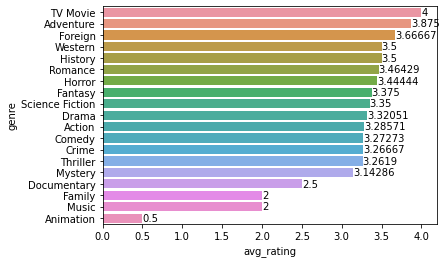

In [16]:
import seaborn as sns
from lib.services.seaborn_service import SeabornService

file_name = 'fav_genres_for_uid_{}'.format(user_id)
SeabornService(x=genre_df['avg_rating'],
               y=genre_df['genre'], file_name=file_name).render()


### 2. Favorite genres per user


In [17]:
top_genres_dict = get_avg_rating_dict(movies_df)
top_genres_df = pd.DataFrame(
    columns=['genre', 'avg_rating'], data=top_genres_dict.items())


<AxesSubplot:xlabel='avg_rating', ylabel='genre'>

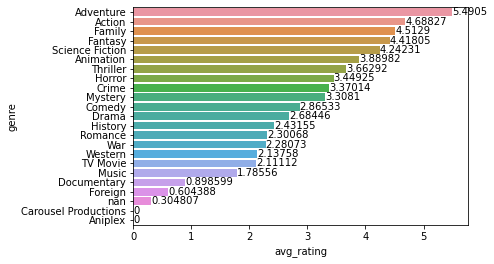

In [18]:
file_name = 'top_genres_base_on_rating'
SeabornService(
    x=top_genres_df['avg_rating'],
    y=top_genres_df['genre'],
    file_name=file_name).render()
